In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import QuantLib as ql

In [3]:
today = ql.Date(17, ql.October, 2016)
ql.Settings.instance().evaluationDate = today

In [4]:
data = [(2, 0.02), (4, 0.0225), (6, 0.025), (8, 0.0275),
        (10, 0.03), (12, 0.0325), (14, 0.035), (16, 0.0375),
        (18, 0.04), (20, 0.0425), (22, 0.045), (24, 0.0475),
        (26, 0.05), (28, 0.0525), (30, 0.055)]

In [5]:
calendar = ql.TARGET()
settlememt = calendar.advance(today, 3, ql.Days)
quotes = []
helpers = []
for length, coupon in data:
    maturity = calendar.advance(settlememt, length, ql.Years)
    schedule = ql.Schedule(settlememt, maturity, ql.Period(ql.Annual), calendar, ql.ModifiedFollowing, ql.ModifiedFollowing, ql.DateGeneration.Backward, False)
    quote = ql.SimpleQuote(100.0)
    quotes.append(quote)
    helpers.append(ql.FixedRateBondHelper(ql.QuoteHandle(quote), 3, 100.0, schedule, [coupon], ql.SimpleDayCounter(), ql.ModifiedFollowing))
curve = ql.FittedBondDiscountCurve(0, calendar, helpers, ql.SimpleDayCounter(), ql.NelsonSiegelFitting())

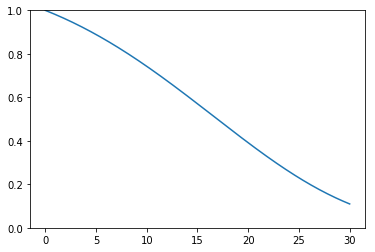

In [7]:
sample_times = np.linspace(0.0, 30.0, 301)
sample_discounts = [curve.discount(t) for t in sample_times]

f, ax = plt.subplots()
ax.set_ylim(0.0, 1.0)
ax.plot(sample_times, sample_discounts)

In [8]:
schedule = ql.Schedule(today, calendar.advance(today, 15, ql.Years), ql.Period(ql.Semiannual), calendar, ql.ModifiedFollowing, ql.ModifiedFollowing, ql.DateGeneration.Backward, False)
bond = ql.FixedRateBond(3, 100.0, schedule, [0.04], ql.Actual360())
bond.setPricingEngine(ql.DiscountingBondEngine(ql.YieldTermStructureHandle(curve)))
print(bond.cleanPrice())

105.77449628297312


In [9]:
prices = []
def print_price():
    p = bond.cleanPrice()
    prices.append(p)
    print(p)
o = ql.Observer(print_price)
o.registerWith(bond)

In [10]:
quotes[2].setValue(101.0)

105.77449628297312
105.86560422617626


In [11]:
quotes[2].setValue(100.0)

105.86560422617626
105.77449630684087


In [12]:
prices = []
for q in quotes:
    q.setValue(101.0)

105.77449630684087
105.28388408564302
105.28388408564302


105.21862882184999
105.21862882184999
105.31959062514876
105.31959062514876
105.4878665910092
105.4878665910092
105.68032097997069
105.68032097997069
105.87580392550738
105.87580392550738
106.06201665731291
106.06201665731291
106.23044639785398
106.23044639785398
106.37409239272378
106.37409239272378
106.48708827051848
106.48708827051848
106.56505211776529
106.56505211776529
106.60570731948839
106.60570731948839
106.60980201489313
106.60980201489313
106.58011180701672
106.58011180701672
106.5207067677768


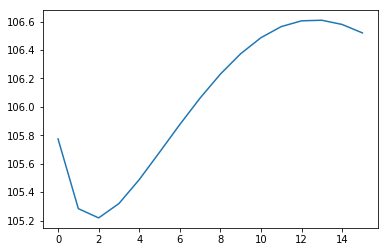

In [13]:
unique_prices = prices[::2]+prices[-1::]
_, ax = plt.subplots()
ax.plot(unique_prices, '-')

In [14]:
bond.freeze()

In [15]:
for q in quotes:
    q.setValue(101.5)

In [16]:
bond.unfreeze()

106.85839350576049


In [17]:
del o

In [18]:
flag = {}
flag['status'] = 'down'
def set_flag():
    flag['status'] = 'up'
o = ql.Observer(set_flag)
o.registerWith(bond)

In [19]:
print(flag)

{'status': 'down'}


In [21]:
for q in quotes:
    q.setValue(100.0)

In [22]:
print(flag)

{'status': 'up'}


In [23]:
bond.cleanPrice()

105.77449624248742

In [24]:
del o

In [25]:
for q in quotes:
    q.setValue(101.0)

In [26]:
bond.cleanPrice()

106.52070692977969